#Arbol de Decision

0.21440095398428732


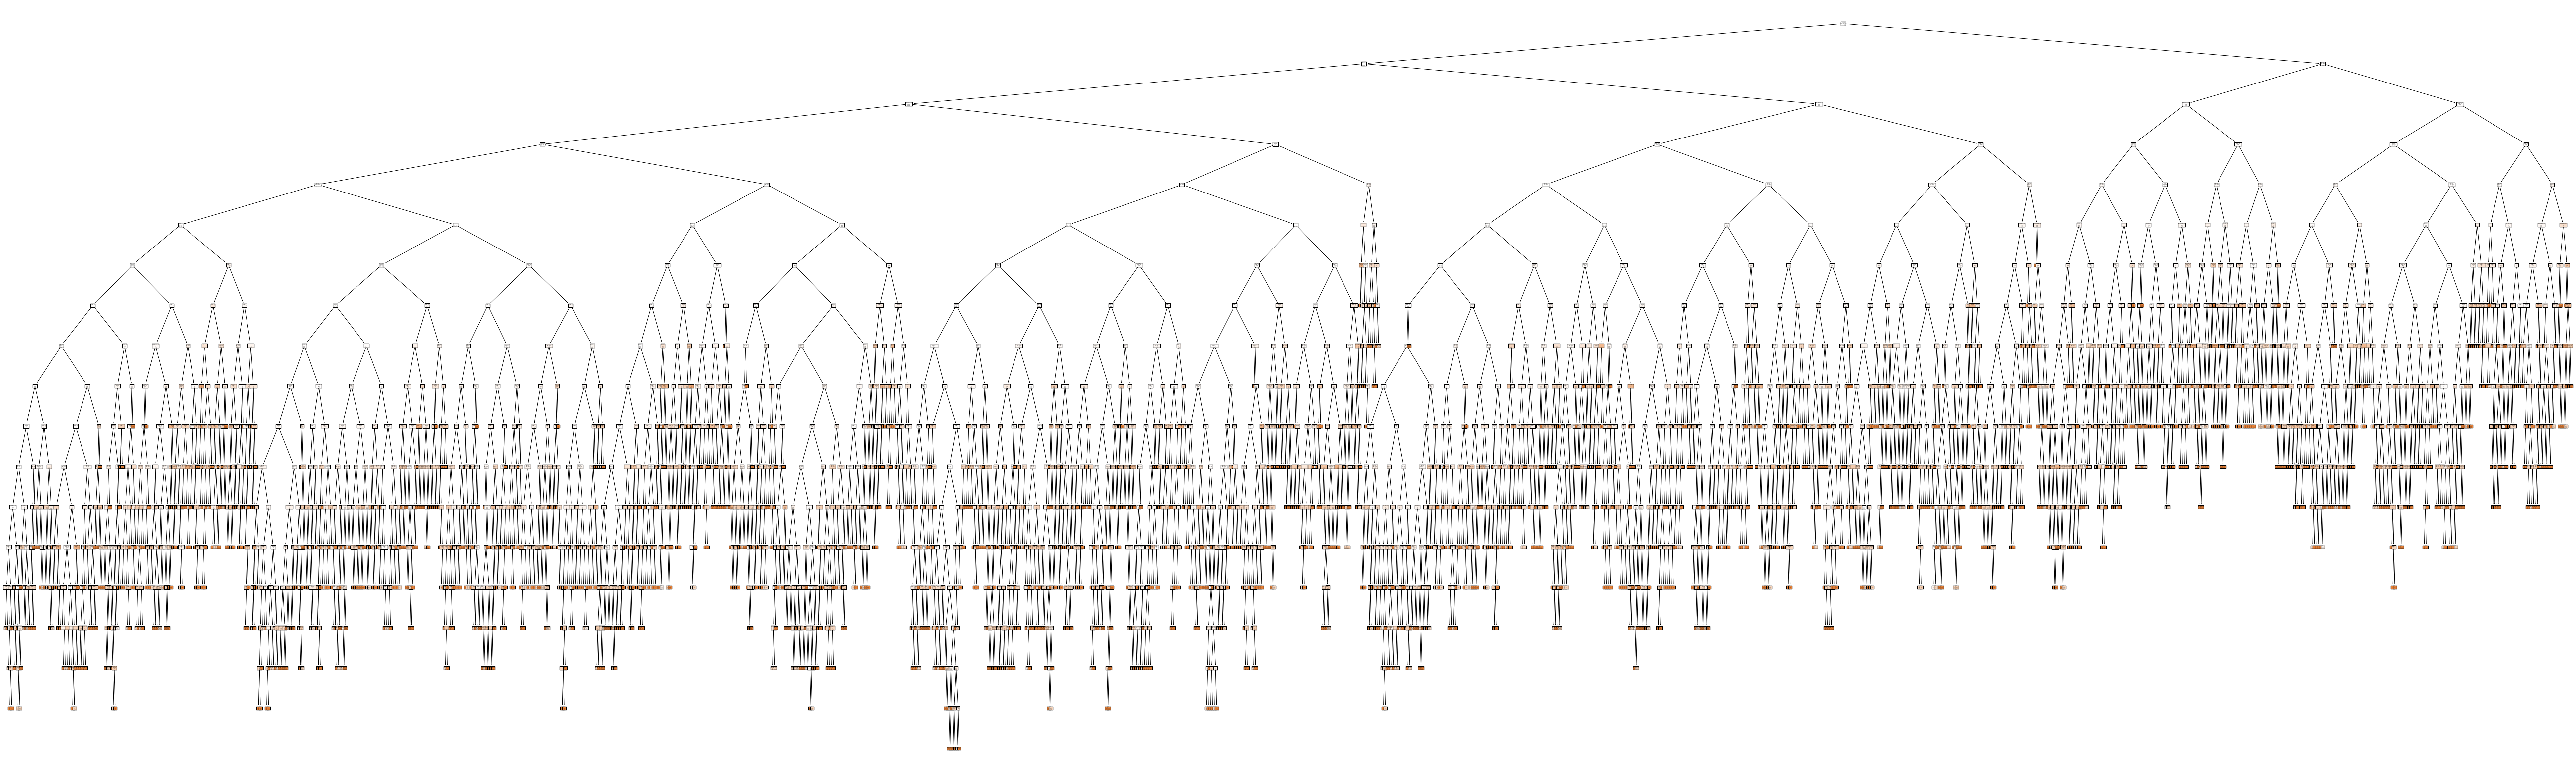

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

#Importando el dataset a estudiar
df = pd.read_csv("Cleaned-Data.csv", sep = ',')

#Tipos de severidad dentro del dataset
typesOfSeverity = ['Severity_Mild', 'Severity_Moderate','Severity_None','Severity_Severe']

#Escogiendo las columnas predictorias
features = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,23,24,25]]

#Escogiendo las columnas a predecir
targets = df.iloc[:, [19,20,21,22]]

#Extrayendo los datos de entrenamiento, y de testeo
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.99, random_state=42)

#Entrenado a nuestro arbol de decision
treeClassifier = DecisionTreeClassifier();
treeClassifier.fit(X_train, Y_train)

#Generamos las predicciones apartir del test que genero train_test_split
predictions = treeClassifier.predict(X_test)

#Miramos su nivel de aciertos
print(accuracy_score(Y_test, predictions))

#Mostramos el arbol de decision
plt.figure(figsize=(100, 30))
tree.plot_tree(treeClassifier, feature_names=features.columns, 
                   class_names=typesOfSeverity, filled=True)
plt.show()

###Este arbol no se puede visualizar del todo bien, ya que su nivel de profundidad es de 26 niveles, lo que hace tener tantos caminos posibles, por lo mismo su nivel de exito es tan bajo, exactamente del 0.21 o 21%, lo cual no garantiza un buen estudio de los datos para predecir que nivel de severidad tendra un paciente covid, tambien este comportamiento se puede deber a que estamos estudiando 4 columnas, sin embargo si estudiamos 1 sola columna como la de 'Severity_Severe', nuestra taza de exitos va a ser 1, ya que, podra predecir si es 0 o 1 gracias a las otras columnas de Severidad, ya que si las otras estan en 0 es porque 'Severity_Severe' es 1.

###Lo que si se puede visualizar es la manera en la cual el arbol va evaluando nodo a nodo, y asi tomando su decision de cual camino tomar, esta seria la manera de clasificacion de los datos.

#Algoritmo KNN

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split

#Importando el dataset a estudiar
df = pd.read_csv("Cleaned-Data.csv", sep = ',')

#Tipos de severidad dentro del dataset
typesOfSeverity = ['Severity_Mild', 'Severity_Moderate','Severity_None','Severity_Severe']

#Escogiendo las columnas predictorias
features = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,23,24,25]]

#Escogiendo las columnas a predecir
targets = df.iloc[:, [19,20,21,22]]

#Extrayendo los datos de entrenamiento, y de testeo
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.75, stratify=targets, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Creando nuestro clasificador de NaivesBayes
kNeighborsClassifier = KNeighborsClassifier(n_neighbors=5)

#Entrenando nuestro clasificador
kNeighborsClassifier.fit(X_train, Y_train)

#Generando las predicciones
predictions = kNeighborsClassifier.predict(X_test)

#Hallando la tasa de aciertos
print(accuracy_score(Y_test, predictions))


0.07166666666666667


###Comparando con nuestro primer analisis con el arbol de decision el algoritmo KNN se comporta de manera similar, tiene una tasa de exito bastante bajo, gracias a que estamos estudiando 4 columnas las cuales tienen las severidades de la enfermedad del covid-19, y nuestro dataset tiene datos muy parecidos, esto hace que el algoritmo KNN sea algo ineficaz a la hora de predecir, como podemos ver tenemos un 0.071 0 7.1% de tasa de exito, ademas que como compara con sus 5 vecinos mas cercanos, esto no le dice mucho al algoritmo, por lo cual nuestra tasa de exito es baja, si cambiaramos nuestra columna objetivo y ya no fueran las 4 de severidad, si no solo una, podriamos ver que nuestra tasa de exito aumentara considerablemente.

#Naive Bayes

In [9]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Importando el dataset a estudiar
df = pd.read_csv("Cleaned-Data.csv", sep = ',')

#Tipos de severidad dentro del dataset
typesOfSeverity = ['Severity_Mild', 'Severity_Moderate','Severity_None','Severity_Severe']

#Escogiendo las columnas predictorias
features = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25]]

#Escogiendo las columna a predecir
targets = df.iloc[:, [22]]

#Extrayendo los datos de entrenamiento, y de testeo
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=0)

#Creando nuestro clasificador de NaivesBayes
naivesBayesClassifier = GaussianNB()

#Entrenando nuestro clasificador
naivesBayesClassifier.fit(X_train, Y_train)

#Generando las predicciones
predictions = naivesBayesClassifier.predict(X_test)

#Hallando la tasa de aciertos
print(accuracy_score(Y_test, predictions))

1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Ya que el clasificador de Naives Bayes no acepta predecir el comportamiento de mas de una columna, por eso solo le pasamos la columna de 'Severity_Severe', y pasa lo mismo que en los modelos anteriores, este clasificador como tiene dentro de sus columnas predictoras las demas severidades, le es facil conseguir si el tipo de severidad es severa o si no lo es, ya que el tipo de severidad severa se prenderia con un 1 mientras que los otros estarian en 0.

In [ ]:
#Definimos las probabilidades condicionales de los sintomas dado el covid-19
probs_sintomas = {
  'fatiga': 0.9,
  'tos_seca' : 0.7,
  'dificultad_respirar' : 0.6,
  'dolor_garganta' : 0.5,
  'dolor_cabeza' : 0.6,
  'dolor_cuerpo' : 0.5,
  'escalofrios' : 0.4,
  'secrecion_nasal' : 0.2,
 'perdida_sentidos': 0.5,
  'fiebre' : 0.8,
  'dolor_pecho' : 0.3
}

#Prevalencia del covid en la poblacion
pob_covid = 0.05

#Definimos los sintomas del paciente
sintomas = ['dolor_pecho', 'fiebre', 'escalofrios', 'dolor_cuerpo', 'dificultad_respirar',
            'fatiga', 'tos_seca', 'dolor_garganta', 'dolor_cabeza', 'secrecion_nasal', 'perdida_sentidos']

#Calculamos la probabilidad de que el paciente tenga covid

prob_covid = 1
for i in range(0, len(sintomas)):
  prob_covid *= probs_sintomas[sintomas[i]]

#Asumimos que la probabilidad de tener estos sintomas sin covid es muy baja
prob_no_covid = 0.05 ** 11

prob_sintomas = prob_covid * pob_covid + prob_no_covid * (1 - pob_covid)

prob_covid_sintomas = prob_covid * pob_covid / prob_sintomas

print(f"La probabilidad de que el paciente que presenta los sintomas: {sintomas}   tenga covid es de {prob_covid_sintomas}")


La probabilidad de que el paciente que presenta los sintomas: ['dolor_pecho', 'fiebre', 'escalofrios', 'dolor_cuerpo', 'dificultad_respirar', 'fatiga', 'tos_seca', 'dolor_garganta', 'dolor_cabeza', 'secrecion_nasal', 'perdida_sentidos']   tenga covid es de 0.9999999998295609


#Pruebas

In [12]:

fever = 1
tiredness = 1
dry_cough = 1
difficulty_in_breathing = 1
sore_throat = 1
none_sympton = 0
pains = 1
nasal_congestion = 1
runny_nose = 1
diarrhea = 1
none_experiencing = 0
age_0_9 = 1
age_10_19 = 0
age_20_24 = 0
age_25_59 = 0
age_60more = 0
gender_female = 0
gender_male = 1
gender_transgender = 0
contact_dont_know = 0
contact_no = 0
contact_yes = 1



paciente = [fever, tiredness, dry_cough, difficulty_in_breathing, sore_throat, none_sympton, pains, nasal_congestion, runny_nose, diarrhea, none_experiencing,
            age_0_9, age_10_19, age_20_24, age_25_59, age_60more, gender_female, gender_male, gender_transgender, contact_dont_know, contact_no, contact_yes]

print(f"Arbol de decision: {treeClassifier.predict([paciente])}")
print(f"KNN: {kNeighborsClassifier.predict([paciente])}")


Arbol de decision: [[1 0 0 0]]
KNN: [[1 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
